Installing datasets to load the required dataset from hugging face

In [17]:
!pip install datasets

Loading the CNN Dailymail dataset

In [18]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('cnn_dailymail', '3.0.0')
train_data = dataset['train'] #'train_data' variable stores Training split

for art,summ in zip(train_data['article'][:5], train_data['highlights'][:5]):
  print("Article:", art)
  print("Summary:",summ)
  print("---")

Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Detai

In [19]:
#prints the total number of articles in your training dataset.
print("Total No. of Articles:", len(train_data))

Total No. of Articles: 287113


In [20]:
#iterates each article in the training dataset and splits it into words using .split()
#calculates the length (word count) of each article
#'article_lengths' contains the word counts for all the articles in the dataset
#'summary_lengths' contains the word counts for all the articles in the dataset

article_lengths = [len(article.split()) for article in train_data['article']]
summary_lengths = [len(summ.split()) for summ in train_data['highlights']]

In [21]:
print("Article Word count Statistics:")
print(min(article_lengths))
print(max(article_lengths))
print(article_lengths[:5])

Article Word count Statistics:
8
2347
[455, 698, 743, 414, 973]


In [33]:
print("Summary Word count Statistics:")
print(min(summary_lengths))
print(max(summary_lengths))
print(summary_lengths[:5])

Summary Word count Statistics:
4
1296
[41, 49, 43, 27, 44]


Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

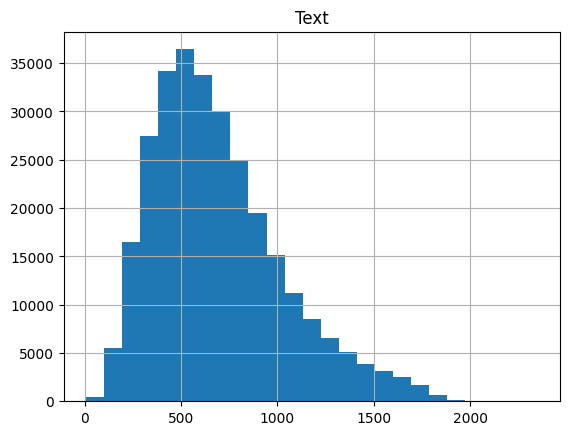

In [22]:
#uses the pandas library and matplotlib to create a histogram to visualize the distribution of article lengths.
#this dataframe contains a column called text
length_df = pd.DataFrame({'Text':article_lengths})
length_df.hist(bins = 25)
plt.show()

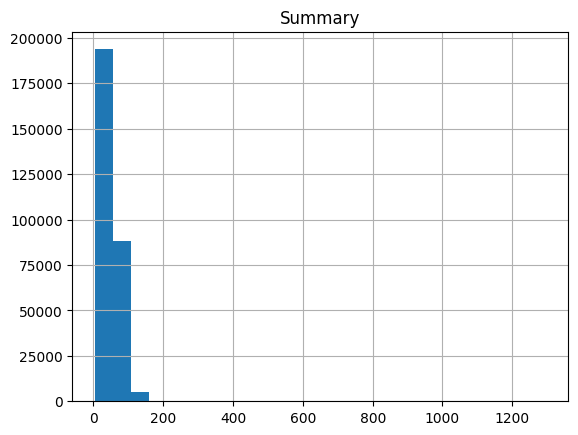

In [25]:
#uses the pandas library and matplotlib to create a histogram to visualize the distribution of summary lengths.
#this dataframe contains a column called summary which stores summary lengths

length_df = pd.DataFrame({ "Summary":summary_lengths})
length_df.hist(bins = 25)
plt.show()

NLTK

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

#NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not","didn't": "did not", "doesn't": "does not", "don't": "do not","hadn't": "had not", "hasn't": "has not", "haven't": "have not","he'd": "he would","he'll": "he will", "he's": "he is","how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have", "I'll": "I will","I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would","i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would","it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have","mustn't": "must not", "mustn't've": "must not have", "needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have","she'd": "she would", "she'd've": "she would have","she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not","shouldn't've": "should not have", "so've": "so have","so's": "so as","this's": "this is","that'd": "that would", "that'd've": "that would have","that's": "that is", "there'd": "there would","there'd've": "there would have", "there's": "there is","here's": "here is","they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have","they're": "they are", "they've": "they have", "to've": "to have","wasn't": "was not", "we'd": "we would", "we'd've": "we would have","we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will","what'll've": "what will have", "what're": "what are","what's": "what is", "what've": "what have", "when's": "when is","when've": "when have", "where'd": "where did", "where's": "where is","where've": "where have", "who'll": "who will", "who'll've": "who will have","who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have","will've": "will have", "won't": "will not", "won't've": "will not have","would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would","you'd've": "you would have", "you'll": "you will", "you'll've": "you will have","you're": "you are", "you've": "you have"}

In [28]:
import multiprocessing
from tqdm import tqdm

In [29]:
#This function takes a single text input, performs several preprocessing steps, and returns the cleaned text

def preprocess_and_clean(text):
    #Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9]', ' ', text)
    #Convert to lowercase
    text = text.lower()
    #Perform Contraction mapping
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    #Tokenize the text
    tokens = word_tokenize(text)
    #Remove stopwords and perform lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [30]:
#This function is useful for efficiently preprocessing a large dataset of text samples in parallel
#uses multiple CPU cores to speed up the process

def preprocess_dataset(dataset):
    num_cpus = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_cpus)
    processed_texts = []
    with tqdm(total=len(dataset), desc="Preprocessing") as pbar:
        for cleaned_text in pool.imap_unordered(preprocess_and_clean, dataset):
            processed_texts.append(cleaned_text)
            pbar.update()
    pool.close()
    pool.join()
    return processed_texts

In [31]:
articles = train_data['article'][0:20000]
highlights = train_data['highlights'][0:20000]

#Preprocess and clean the dataset
cleaned_articles = preprocess_dataset(articles)
cleaned_highlights = preprocess_dataset(highlights)

Preprocessing: 100%|██████████| 20000/20000 [00:20<00:00, 970.83it/s] 


In [32]:
#Print the cleaned dataset
for art,summ in zip(cleaned_articles[0:5],cleaned_highlights[0:5]):
    print('Article:', art)
    print('Highlights:', summ)
    print('---')

Article: london england reuters harry potter star daniel radcliffe gain access reported 20 million 41 1 million fortune turn 18 monday insists money cast spell daniel radcliffe harry potter harry potter order phoenix disappointment gossip columnist around world young actor say plan fritter cash away fast car drink celebrity party plan one people soon turn 18 suddenly buy massive sport car collection something similar told australian interviewer earlier month think particularly extravagant thing like buying thing cost 10 pound book cd dvd 18 radcliffe able gamble casino buy drink pub see horror film hostel part ii currently six place number one movie uk box office chart detail mark landmark birthday wrap agent publicist comment plan definitely sort party said interview hopefully none reading radcliffe earnings first five potter film held trust fund able touch despite growing fame rich actor say keeping foot firmly ground people always looking say kid star go rail told reporter last mont

BART implementation

In [34]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.8 MB/s eta 0:00:00


In [35]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

In [36]:
#useing the pre-trained BART-Large-CNN model
bart_PATH = 'facebook/bart-large-cnn'

#retrieve the past states when generating text
bart_model = BartForConditionalGeneration.from_pretrained(bart_PATH, output_past=True)
bart_tokenizer = BartTokenizer.from_pretrained(bart_PATH)

#variable x contains the tokenized representation of cleaned articles
x = bart_tokenizer(cleaned_articles, truncation=True, max_length=500)

In [37]:
def bart_summarize(input_text, num_beams=4, num_words=80):

    #removes any extra spaces
    input_text = ' '.join(input_text.split())

    #tokenizes the preprocessed input_text using the BART tokenizer
    #tokenized input is returned as a PyTorch tensor ('pt').
    input_tokenized = bart_tokenizer.encode(input_text, return_tensors='pt')

    #generates summary using the BART model
    summary_ids = bart_model.generate(input_tokenized, num_beams=int(num_beams), no_repeat_ngram_size=3, length_penalty=2.0, min_length=10, max_length=int(num_words), early_stopping=True)

    #decodes the generated summary IDs back into human-readable text.
    #retains the original spacing
    output = [bart_tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids]

    #generates first summary
    return output[0]

In [38]:
for i in range(5):
  print("Whole Article:",cleaned_articles[i])
  print('Original Summary:',cleaned_highlights[i])
  print("Bart Predicted Summary:", bart_summarize(cleaned_articles[i]))
  print('---')
  print()

Whole Article: london england reuters harry potter star daniel radcliffe gain access reported 20 million 41 1 million fortune turn 18 monday insists money cast spell daniel radcliffe harry potter harry potter order phoenix disappointment gossip columnist around world young actor say plan fritter cash away fast car drink celebrity party plan one people soon turn 18 suddenly buy massive sport car collection something similar told australian interviewer earlier month think particularly extravagant thing like buying thing cost 10 pound book cd dvd 18 radcliffe able gamble casino buy drink pub see horror film hostel part ii currently six place number one movie uk box office chart detail mark landmark birthday wrap agent publicist comment plan definitely sort party said interview hopefully none reading radcliffe earnings first five potter film held trust fund able touch despite growing fame rich actor say keeping foot firmly ground people always looking say kid star go rail told reporter las

ROUGE score calculation

In [39]:
!pip install rouge-score
!pip install rouge

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=d0891f514cbf04180ba8ea21f59f2e7ad3080a02a677416ee9901d72e4e762ab
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [40]:
from rouge import Rouge

# Define the generated summary and reference summary
generated_summary_bart = '''President bush had his first colonoscopy on Friday.
On Saturday none appeared worrisome. President bush reclaimed presidential power
two hour doctor used monitored anesthesia care. Vice President cheney meanwhile spent morning
home maryland eastern shore reading playing dog. The president played scottish terrier
barney miss beazley after the procedure. He also planned to resume activity camp on Sunday.'''

reference_summary = '''five small polyp found procedure none worrisome spokesman
say president reclaims power transferred vice president bush undergoes routine colonoscopy camp david'''

# Initialize Rouge scorer
rouge_scorer = Rouge()

# Calculate ROUGE scores
rouge_scores = rouge_scorer.get_scores(generated_summary_bart,reference_summary)

In [41]:
# Print the ROUGE scores
print("ROUGE Scores:")
print(f"ROUGE-1 Unigrams: {rouge_scores[0]['rouge-1']}")
print(f"ROUGE-2 Bigrams: {rouge_scores[0]['rouge-2']}")
print(f"ROUGE-L LCS: {rouge_scores[0]['rouge-l']}")

ROUGE Scores:
ROUGE-1 Unigrams: {'r': 0.4, 'p': 0.14814814814814814, 'f': 0.21621621227173124}
ROUGE-2 Bigrams: {'r': 0.0, 'p': 0.0, 'f': 0.0}
ROUGE-L LCS: {'r': 0.3, 'p': 0.1111111111111111, 'f': 0.16216215821767724}


In [46]:
# User define function for Input Article and Generate Summary
def summarize_text(text, num_words):
    # Generate summary using the bart model
    summary = bart_summarize(text, num_words=num_words)
    return summary

# User Input
user_input = input("Enter the text to summarize: ")
# max length of summary
num_words = 50

# Generate Summary
summary = summarize_text(user_input,num_words)

print("Input Text:",user_input)
print()
print("Bart Generated Summary:", summary)

Enter the text to summarize: If you want to create a machine learning model but say you don’t have a computer that can take the workload, Google Colab is the platform for you. Even if you have a GPU or a good computer creating a local environment with Anaconda and installing packages and resolving installation issues are a hassle. Colab is a free Jupyter Notebook environment provided by Google where you can use free GPUs and TPUs which can solve all these issues.
Input Text: If you want to create a machine learning model but say you don’t have a computer that can take the workload, Google Colab is the platform for you. Even if you have a GPU or a good computer creating a local environment with Anaconda and installing packages and resolving installation issues are a hassle. Colab is a free Jupyter Notebook environment provided by Google where you can use free GPUs and TPUs which can solve all these issues.

Bart Generated Summary: If you want to create a machine learning model but say y